In [16]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline 

In [17]:
#Importing dataset 
from sklearn.datasets import fetch_california_housing
california_data = fetch_california_housing()

In [18]:
print(california_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [19]:
print(california_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [20]:
california = pd.DataFrame(california_data.data, columns=california_data.feature_names)
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
california['MedHouseVal'] = california_data.target

In [22]:
#To find missing values
california.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

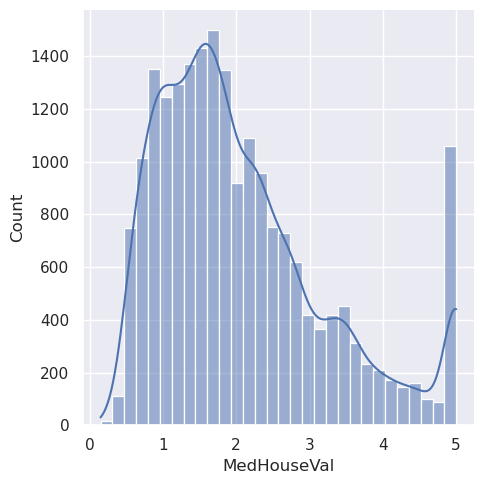

In [23]:
# Set figure size
sns.set(rc={'figure.figsize':(11.7, 8.27)})
# Plot distribution with displot
sns.displot(california['MedHouseVal'], bins=30, kde=True)
plt.show()

<Axes: >

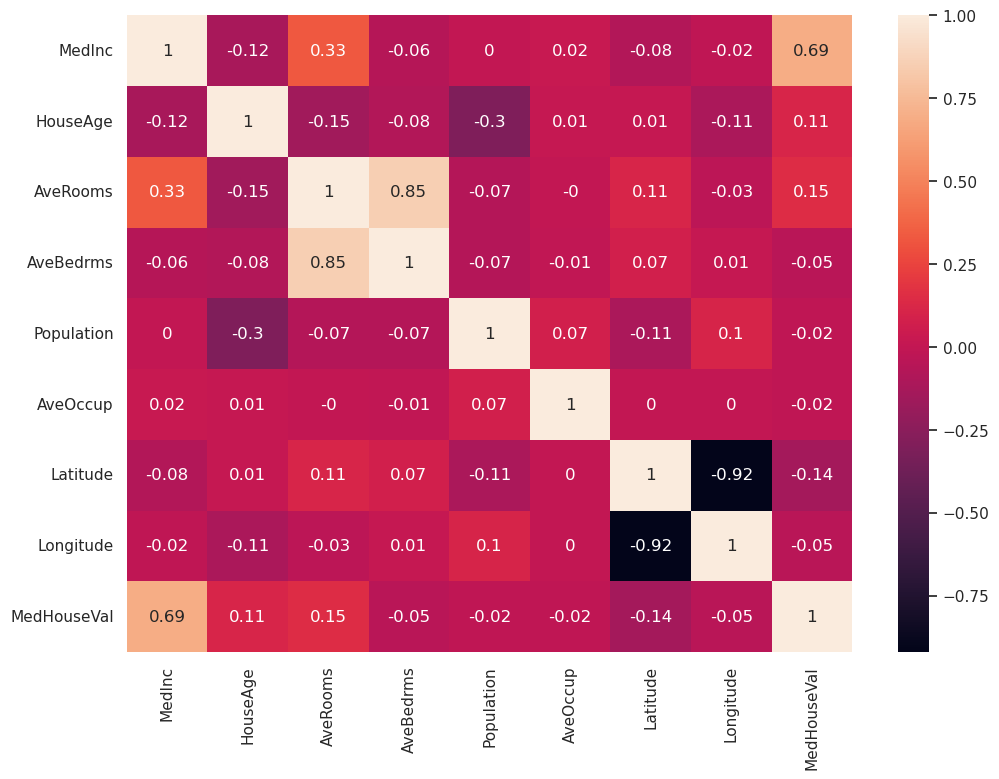

In [24]:
correlation_matrix = california.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

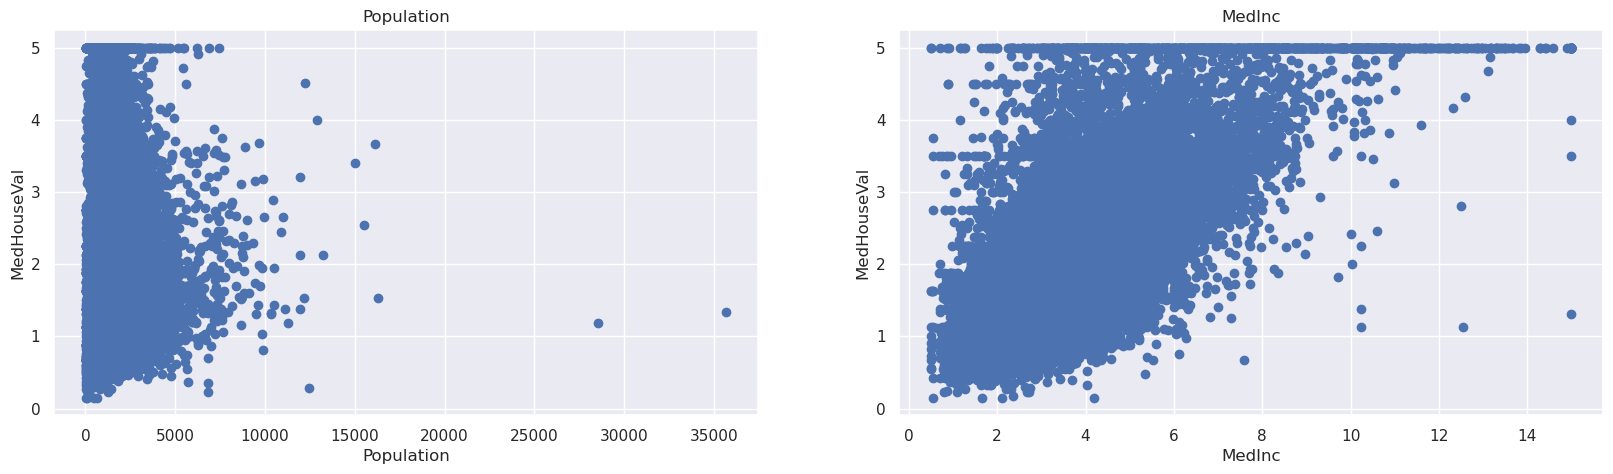

In [25]:
plt.figure(figsize=(20, 5))

features = ['Population', 'MedInc']
target = california['MedHouseVal']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = california[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MedHouseVal')

In [26]:
X = pd.DataFrame(np.c_[california['AveBedrms'], california['MedInc']], columns = ['LSTAT','RM'])
Y = california['MedHouseVal']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 2)
(4128, 2)
(16512,)
(4128,)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [32]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.8359205966042196
R2 score is 0.47039646793200596


The model performance for testing set
--------------------------------------
RMSE is 0.8430702438497876
R2 score is 0.48483318370175144


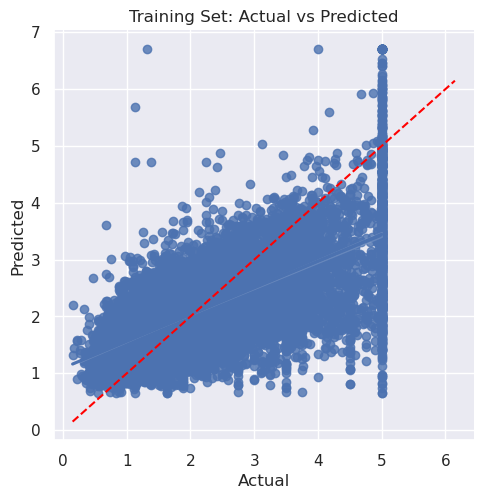

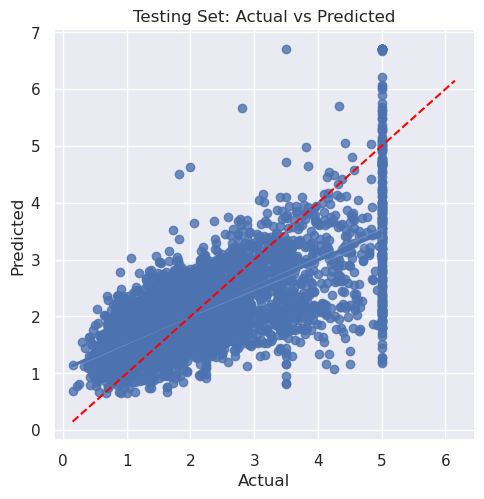

In [36]:
# Create DataFrame for plotting
df_train_results = pd.DataFrame({
    'Actual': Y_train,
    'Predicted': y_train_predict.flatten()  # Ensure y_train_predict is a 1D array
})

df_test_results = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_test_predict.flatten()  # Ensure y_test_predict is a 1D array
})

# Plot for Training Set
sns.lmplot(x='Actual', y='Predicted', data=df_train_results, fit_reg=True)
d_line = np.arange(df_train_results.min().min(), df_train_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Plot for Testing Set
sns.lmplot(x='Actual', y='Predicted', data=df_test_results, fit_reg=True)
d_line = np.arange(df_test_results.min().min(), df_test_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()